Installing Fastai

In [ ]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 720 kB 6.8 MB/s 
     |████████████████████████████████| 188 kB 71.9 MB/s 
     |████████████████████████████████| 46 kB 5.9 MB/s 
     |████████████████████████████████| 1.2 MB 56.3 MB/s 
     |████████████████████████████████| 56 kB 5.4 MB/s 
     |████████████████████████████████| 51 kB 430 kB/s 
Mounted at /content/gdrive


Importing Fastai

In [ ]:
from fastbook import *

In [ ]:
from fastai.vision.all import *
path=untar_data(URLs.PETS)

Setting Base Path

In [ ]:
Path.BASE_PATH=path

In [ ]:
path.ls()

(#2) [Path('annotations'),Path('images')]

In [ ]:
(path/'images').ls()

(#7393) [Path('images/saint_bernard_108.jpg'),Path('images/Ragdoll_181.jpg'),Path('images/yorkshire_terrier_37.jpg'),Path('images/beagle_200.jpg'),Path('images/newfoundland_135.jpg'),Path('images/Russian_Blue_177.jpg'),Path('images/american_bulldog_83.jpg'),Path('images/havanese_67.jpg'),Path('images/Abyssinian_185.jpg'),Path('images/leonberger_5.jpg')...]

In [ ]:
fname=(path/'images').ls()[0]

In [ ]:
re.findall(r'(.+)_\d+.jpg$',fname.name)

['saint_bernard']

Building a Datablock Object

In [ ]:
datablock=DataBlock(blocks=(ImageBlock,CategoryBlock),
                    get_items=get_image_files,
                    splitter=RandomSplitter(seed=42),
                    get_y=using_attr(RegexLabeller(pat=r'(.+)_\d+.jpg$'),'name'),
                    item_tfms=Resize(460),
                    batch_tfms=aug_transforms(size=224,min_scale=0.75)
                    )

In [ ]:
dls=datablock.dataloaders(path/'images')

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1023: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  /pytorch/aten/src/ATen/native/BatchLinearAlgebra.cpp:760.)
  ret = func(*args, **kwargs)


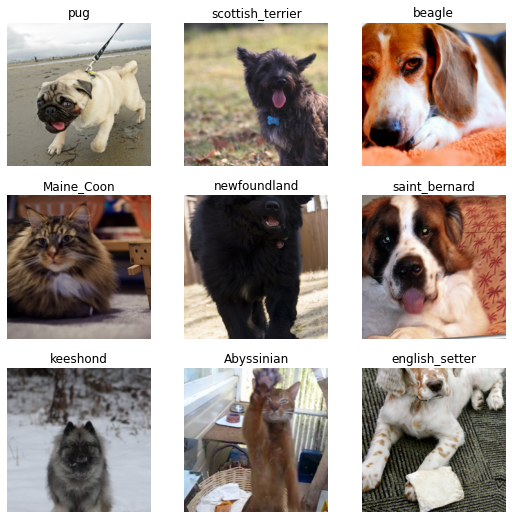

In [ ]:
dls.show_batch()

Creating a CNN Learner

In [ ]:
learn=cnn_learner(dls,resnet34,metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


epoch,train_loss,valid_loss,error_rate,time
0,1.485001,0.347160,0.107578,01:08


epoch,train_loss,valid_loss,error_rate,time
0,0.505321,0.296665,0.092693,01:12
1,0.402898,0.298634,0.093369,01:12
2,0.245781,0.241409,0.080514,01:12
3,0.158531,0.216076,0.067659,01:12


In [ ]:
x,y=dls.one_batch()

Getting Preictions

In [ ]:
preds,_=learn.get_preds(dl=[(x,y)])
preds

tensor([[4.7882e-08, 6.4526e-07, 3.8805e-08,  ..., 1.7478e-08, 6.8674e-08, 6.7069e-08],
        [4.9424e-09, 1.6416e-09, 4.8813e-07,  ..., 4.9313e-08, 1.7913e-08, 1.6694e-09],
        [3.1630e-07, 1.3011e-07, 3.1979e-05,  ..., 2.5867e-08, 3.8910e-06, 9.9989e-01],
        ...,
        [1.2293e-08, 8.8437e-09, 1.0830e-05,  ..., 1.4476e-06, 8.1720e-07, 3.7716e-07],
        [1.6418e-08, 1.9895e-09, 1.7697e-09,  ..., 1.8943e-08, 3.4881e-08, 8.0341e-10],
        [6.4352e-07, 1.3443e-05, 2.4805e-07,  ..., 6.6641e-04, 1.4022e-04, 3.6099e-07]])

In [ ]:
len(preds[0]),preds[0].sum()

(37, tensor(1.))